In [3]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
port = '5432'
username = 'postgres'
password = '12345678'
host = 'database-1.chueoayw4q5g.ca-central-1.rds.amazonaws.com'
database = 'Crypto20_db'

In [5]:
con = psycopg2.connect(
    user = username,
    password = password,
    host = host,
    port = port,
    database = database
)

In [6]:
cursor = con.cursor()

In [7]:
cursor.execute('SELECT * FROM public."Binance" ORDER BY "Date"')

In [8]:
[i[0] for i in cursor.description]

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [9]:
bin1 = pd.DataFrame(cursor.fetchall(),columns=[i[0] for i in cursor.description])

In [10]:
bin1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353 entries, 0 to 2352
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2353 non-null   object 
 1   Open       2353 non-null   float64
 2   High       2353 non-null   float64
 3   Low        2353 non-null   float64
 4   Close      2353 non-null   float64
 5   Adj Close  2353 non-null   float64
 6   Volume     2353 non-null   float64
dtypes: float64(6), object(1)
memory usage: 128.8+ KB


In [11]:
bin1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,2.05,2.17,1.89,1.99,1.99,1.919220e+07
1,2017-11-10,2.01,2.07,1.64,1.80,1.80,1.115500e+07
2,2017-11-11,1.79,1.92,1.61,1.67,1.67,8.178150e+06
3,2017-11-12,1.67,1.67,1.46,1.52,1.52,1.529870e+07
4,2017-11-13,1.53,1.74,1.52,1.69,1.69,1.223880e+07
...,...,...,...,...,...,...,...
2348,2024-04-14,554.30,570.26,537.18,567.22,567.22,1.724306e+09
2349,2024-04-15,567.22,585.49,546.87,552.87,552.87,1.488692e+09
2350,2024-04-16,552.87,554.10,524.22,537.83,537.83,1.299731e+09
2351,2024-04-17,537.83,548.04,514.11,534.42,534.42,1.411927e+09


In [12]:
query = """select * from information_schema.tables where table_schema = 'public'"""

In [13]:
cursor.execute(query)

In [14]:
information = pd.DataFrame(cursor.fetchall(),columns=[i[0] for i in cursor.description])

In [46]:
table_names = information['table_name'].iloc[:20]

In [47]:
# df = pd.DataFrame([])
flag = True
for j in table_names:
    query = f'SELECT * FROM public."{j}" ORDER BY "Date"'
    cursor.execute(query)
    if flag == True:
        cols = ['Date'] + [i[0]+'_'+j for i in cursor.description if 'date' not in i[0].lower()]
        df = pd.DataFrame(cursor.fetchall(),columns=cols)
        flag = False
    else:
        cols = ['Date'] + [i[0]+'_'+j for i in cursor.description if 'date' not in i[0].lower()]
        temp_df = pd.DataFrame(cursor.fetchall(),columns=cols)
        df = df.merge(right=temp_df,on = 'Date')

In [48]:
df

,Date,Open_Bitcoin,High_Bitcoin,Low_Bitcoin,Close_Bitcoin,Adj Close_Bitcoin,Volume_Bitcoin,Open_Bitcoin_cash,High_Bitcoin_cash,Low_Bitcoin_cash,...,Low_dodge,Close_dodge,Adj Close_dodge,Volume_dodge,Open_steth,High_steth,Low_steth,Close_steth,Adj Close_steth,Volume_steth
0,2022-03-05,39148.45,39566.34,38777.04,39400.59,39400.59,1.697592e+10,290.00,294.96,285.64,...,0.12,0.12,0.12,3.340916e+08,2605.87,2673.83,2581.31,2637.91,2637.91,150593.0
1,2022-03-06,39404.20,39640.18,38211.65,38419.98,38419.98,1.974523e+10,294.02,295.85,283.08,...,0.12,0.12,0.12,4.004585e+08,2637.92,2683.87,2546.72,2549.64,2549.64,255332.0
2,2022-03-07,38429.30,39430.23,37260.20,38062.04,38062.04,2.854614e+10,283.10,290.43,272.12,...,0.12,0.12,0.12,5.130148e+08,2549.90,2636.55,2444.41,2491.44,2491.44,1466840.0
3,2022-03-08,38059.90,39304.44,37957.39,38737.27,38737.27,2.577658e+10,274.91,288.91,273.89,...,0.12,0.12,0.12,4.914143e+08,2491.42,2618.14,2483.99,2572.36,2572.36,1178254.0
4,2022-03-09,38742.82,42465.67,38706.09,41982.93,41982.93,3.228412e+10,284.40,316.10,284.38,...,0.12,0.12,0.12,5.191575e+08,2572.18,2763.74,2567.36,2725.35,2725.35,489820.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,2024-04-14,63836.23,65824.43,62205.85,65738.73,65738.73,4.908432e+10,481.48,529.78,457.46,...,0.14,0.16,0.16,3.723264e+09,3000.47,3159.81,2908.68,3149.70,3149.70,251758398.0
772,2024-04-15,65739.65,66878.65,62332.07,63426.21,63426.21,4.359592e+10,527.90,566.69,493.01,...,0.15,0.16,0.16,3.604720e+09,3149.70,3255.19,3041.09,3095.45,3095.45,170977618.0
773,2024-04-16,63419.30,64355.67,61716.40,63811.86,63811.86,4.284753e+10,507.92,510.05,465.90,...,0.15,0.16,0.16,2.473810e+09,3095.45,3112.46,3001.08,3078.09,3078.09,140420639.0
774,2024-04-17,63831.85,64486.36,59768.59,61276.69,61276.69,4.191525e+10,487.41,489.66,449.14,...,0.14,0.15,0.15,1.972028e+09,3078.09,3113.38,2920.63,2977.61,2977.61,171142358.0


In [49]:
open_df = df[["Date"]+[i for i in list(df.columns) if 'Open' in i]]
vol_df = df[["Date"]+[i for i in list(df.columns) if 'Vol' in i]]

In [50]:
open_df

,Date,Open_Bitcoin,Open_Bitcoin_cash,Open_Ethereum,Open_Binance,Open_Toncoin,Open_usdc_coin,Open_Cardano,Open_Avalanche,Open_Polygon,...,Open_shiba_inu,Open_Polkadot,Open_Wrapped_Bitcoin,Open_Tether,Open_tron,Open_Wrapped_TRON,Open_Solana,Open_xrp,Open_dodge,Open_steth
0,2022-03-05,39148.45,290.00,2618.47,374.44,1.82,1.0,0.84,75.69,1.48,...,0.0,16.77,39202.29,1.0,0.06,0.06,88.29,0.71,0.12,2605.87
1,2022-03-06,39404.20,294.02,2664.94,384.91,1.78,1.0,0.87,76.74,1.51,...,0.0,17.31,39390.06,1.0,0.06,0.06,89.65,0.75,0.13,2637.92
2,2022-03-07,38429.30,283.10,2555.30,375.07,1.62,1.0,0.82,72.53,1.44,...,0.0,16.98,38386.23,1.0,0.06,0.06,84.55,0.73,0.12,2549.90
3,2022-03-08,38059.90,274.91,2497.72,381.25,1.78,1.0,0.80,71.87,1.42,...,0.0,16.43,38058.35,1.0,0.06,0.06,82.11,0.72,0.12,2491.42
4,2022-03-09,38742.82,284.40,2577.17,382.04,1.95,1.0,0.80,72.95,1.45,...,0.0,16.96,38718.07,1.0,0.06,0.06,82.28,0.72,0.12,2572.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,2024-04-14,63836.23,481.48,3005.55,554.30,5.95,1.0,0.45,34.08,0.66,...,0.0,6.42,64130.70,1.0,0.11,0.11,139.34,0.48,0.15,3000.47
772,2024-04-15,65739.65,527.90,3156.83,567.22,6.76,1.0,0.47,37.32,0.71,...,0.0,6.87,65679.77,1.0,0.11,0.11,151.30,0.50,0.16,3149.70
773,2024-04-16,63419.30,507.92,3101.14,552.87,6.56,1.0,0.46,35.16,0.71,...,0.0,6.71,63412.14,1.0,0.11,0.11,138.51,0.50,0.16,3095.45
774,2024-04-17,63831.85,487.41,3084.92,537.83,6.34,1.0,0.46,34.77,0.70,...,0.0,6.70,63762.16,1.0,0.11,0.11,136.28,0.50,0.16,3078.09


In [51]:
vol_df

,Date,Volume_Bitcoin,Volume_Bitcoin_cash,Volume_Ethereum,Volume_Binance,Volume_Toncoin,Volume_usdc_coin,Volume_Cardano,Volume_Avalanche,Volume_Polygon,...,Volume_shiba_inu,Volume_Polkadot,Volume_Wrapped_Bitcoin,Volume_Tether,Volume_tron,Volume_Wrapped_TRON,Volume_Solana,Volume_xrp,Volume_dodge,Volume_steth
0,2022-03-05,1.697592e+10,3.571444e+09,8.072368e+09,1.321263e+09,2195291.0,2.645373e+09,7.348963e+08,9.932856e+08,5.597683e+08,...,7.228360e+08,757666761.0,151448388.0,3.930605e+10,6.574355e+08,1242664.0,1.437162e+09,2.297851e+09,3.340916e+08,150593.0
1,2022-03-06,1.974523e+10,3.599409e+09,8.872977e+09,1.305295e+09,3123933.0,3.162814e+09,6.700249e+08,9.135415e+08,5.788614e+08,...,6.394540e+08,737656667.0,145836821.0,4.391437e+10,7.582605e+08,1147624.0,1.467562e+09,1.862292e+09,4.004585e+08,255332.0
2,2022-03-07,2.854614e+10,3.644281e+09,1.459410e+10,2.058322e+09,7555155.0,4.227524e+09,1.040234e+09,1.144242e+09,1.012798e+09,...,8.771418e+08,944798572.0,158403026.0,6.133383e+10,8.932611e+08,1896907.0,2.375648e+09,2.920222e+09,5.130148e+08,1466840.0
3,2022-03-08,2.577658e+10,3.565673e+09,1.392292e+10,1.684540e+09,9923457.0,4.167069e+09,9.559520e+08,1.344907e+09,8.967999e+08,...,7.038554e+08,874178607.0,113113756.0,5.566792e+10,1.091513e+09,1658131.0,2.112766e+09,1.907306e+09,4.914143e+08,1178254.0
4,2022-03-09,3.228412e+10,3.604288e+09,1.417367e+10,2.425559e+09,4479299.0,4.206641e+09,9.808695e+08,1.650128e+09,9.889218e+08,...,9.514349e+08,857533887.0,232597386.0,6.701788e+10,1.111369e+09,2175214.0,2.624861e+09,2.408572e+09,5.191575e+08,489820.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,2024-04-14,4.908432e+10,9.822610e+08,2.548628e+10,1.724306e+09,658770776.0,1.099638e+10,9.610188e+08,1.185559e+09,6.230717e+08,...,1.290825e+09,511526862.0,443914852.0,9.863039e+10,4.398687e+08,2180727.0,7.110974e+09,2.824792e+09,3.723264e+09,251758398.0
772,2024-04-15,4.359592e+10,8.904469e+08,2.192584e+10,1.488692e+09,595783529.0,9.899289e+09,7.187128e+08,9.318184e+08,4.462128e+08,...,1.000689e+09,344174099.0,387495746.0,8.703180e+10,4.970810e+08,2886301.0,5.699439e+09,2.356318e+09,3.604720e+09,170977618.0
773,2024-04-16,4.284753e+10,7.574835e+08,1.944139e+10,1.299731e+09,481935483.0,9.306979e+09,5.182028e+08,6.977194e+08,3.398949e+08,...,8.923701e+08,239057451.0,337021535.0,7.738816e+10,4.250353e+08,1895756.0,5.156085e+09,1.913161e+09,2.473810e+09,140420639.0
774,2024-04-17,4.191525e+10,5.578792e+08,1.771187e+10,1.411927e+09,428261504.0,8.797321e+09,4.864091e+08,6.034557e+08,2.974975e+08,...,5.921447e+08,202508444.0,353304024.0,7.111855e+10,3.720917e+08,1559520.0,4.888547e+09,1.791966e+09,1.972028e+09,171142358.0


In [52]:
market_cap = pd.DataFrame([])
market_cap['Date'] = open_df['Date']
for i in table_names:
    open_col = 'Open_' + i
    vol_col = 'Volume_' + i
    market_cap[i] = open_df[open_col] * vol_df[vol_col]

In [53]:
market_cap['total'] = market_cap.iloc[:,1:].sum(axis=1)

In [54]:
market_cap

,Date,Bitcoin,Bitcoin_cash,Ethereum,Binance,Toncoin,usdc_coin,Cardano,Avalanche,Polygon,...,Polkadot,Wrapped_Bitcoin,Tether,tron,Wrapped_TRON,Solana,xrp,dodge,steth,total
0,2022-03-05,6.645809e+14,1.035719e+12,2.113725e+13,4.947336e+11,3.995430e+06,2.645373e+09,6.173129e+08,7.518178e+10,8.284570e+08,...,1.270607e+10,5.937124e+12,3.930605e+10,39446128.56,74559.84,1.268870e+11,1.631474e+09,4.009099e+07,3.924258e+08,6.934519e+14
1,2022-03-06,7.780450e+14,1.058298e+12,2.364595e+13,5.024212e+11,5.560601e+06,3.162814e+09,5.829216e+08,7.010518e+10,8.740807e+08,...,1.276884e+10,5.744521e+12,4.391437e+10,45495631.62,68857.44,1.315669e+11,1.396719e+09,5.205960e+07,6.735454e+08,8.092679e+14
2,2022-03-07,1.097008e+15,1.031696e+12,3.729230e+13,7.720147e+11,1.223935e+07,4.227524e+09,8.529921e+08,8.299189e+10,1.458428e+09,...,1.604268e+10,6.080495e+12,6.133383e+10,53595664.86,113814.42,2.008611e+11,2.131762e+09,6.156178e+07,3.740295e+09,1.142570e+15
3,2022-03-08,9.810542e+14,9.802393e+11,3.477556e+13,6.422309e+11,1.766375e+07,4.167069e+09,7.647616e+08,9.665845e+10,1.273456e+09,...,1.436275e+10,4.304923e+12,5.566792e+10,65490795.72,99487.86,1.734792e+11,1.373260e+09,5.896972e+07,2.935526e+09,1.022118e+15
4,2022-03-09,1.250778e+15,1.025060e+12,3.652795e+13,9.266606e+11,8.734633e+06,4.206641e+09,7.846956e+08,1.203769e+11,1.433937e+09,...,1.454377e+10,9.005722e+12,6.701788e+10,66682154.88,130512.84,2.159735e+11,1.734172e+09,6.229890e+07,1.259905e+09,1.298702e+15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,2024-04-14,3.133358e+15,4.729390e+11,7.660030e+13,9.557827e+11,3.919686e+09,1.099638e+10,4.324584e+08,4.040386e+10,4.112273e+08,...,3.284002e+09,2.846857e+13,9.863039e+10,48385551.83,239879.97,9.908431e+11,1.355900e+09,5.584896e+08,7.553935e+11,3.241772e+15
772,2024-04-15,2.865980e+15,4.700669e+11,6.921616e+13,8.444161e+11,4.027497e+09,9.899289e+09,3.377950e+08,3.477546e+10,3.168111e+08,...,2.364476e+09,2.545063e+13,8.703180e+10,54678909.34,317493.11,8.623252e+11,1.178159e+09,5.767552e+08,5.385282e+11,2.963511e+15
773,2024-04-16,2.717360e+15,3.847410e+11,6.029048e+13,7.185823e+11,3.161497e+09,9.306979e+09,2.383733e+08,2.453181e+10,2.413254e+08,...,1.604075e+09,2.137126e+13,7.738816e+10,46753881.02,208533.16,7.141693e+11,9.565804e+08,3.958097e+08,4.346651e+11,2.801398e+15
774,2024-04-17,2.675528e+15,2.719159e+11,5.463970e+13,7.593770e+11,2.715178e+09,8.797321e+09,2.237482e+08,2.098216e+10,2.082482e+08,...,1.356807e+09,2.252743e+13,7.111855e+10,40930088.87,171547.20,6.662111e+11,8.959832e+08,3.155245e+08,5.267916e+11,2.755031e+15


In [55]:
px.line(x=market_cap['Date'],y=market_cap['total'],title='Market Cap',labels={'x':'Date','y':'Value'})

In [42]:
percent_market_cap = pd.DataFrame([])
percent_market_cap['Date'] = open_df['Date']
for i in table_names:
    percent_market_cap[i] = market_cap[i]/market_cap['total']*100

In [43]:
percent_market_cap

,Date,Bitcoin,Bitcoin_cash,Ethereum,Binance,Toncoin,usdc_coin,Cardano,Avalanche,Polygon,Chainlink
0,2021-08-27,96.397229,0.112231,3.410120,0.073078,1.776521e-08,0.000161,0.001217,0.004122,0.000081,0.001761
1,2021-08-28,96.704386,0.134506,3.097250,0.057215,1.190664e-08,0.000121,0.001120,0.004030,0.000072,0.001300
2,2021-08-29,96.490840,0.148248,3.289598,0.065337,9.182690e-09,0.000149,0.001149,0.003025,0.000072,0.001582
3,2021-08-30,95.967064,0.123477,3.844690,0.059482,2.590295e-08,0.000162,0.000918,0.002529,0.000075,0.001604
4,2021-08-31,94.708639,0.116019,5.106357,0.063522,9.093138e-08,0.000194,0.000808,0.002076,0.000078,0.002307
...,...,...,...,...,...,...,...,...,...,...,...
961,2024-04-14,97.568238,0.014727,2.385223,0.029762,1.220534e-04,0.000342,0.000013,0.001258,0.000013,0.000302
962,2024-04-15,97.596243,0.016007,2.357042,0.028755,1.371498e-04,0.000337,0.000012,0.001184,0.000011,0.000271
963,2024-04-16,97.789080,0.013846,2.169661,0.025859,1.137721e-04,0.000335,0.000009,0.000883,0.000009,0.000206
964,2024-04-17,97.960302,0.009956,2.000548,0.027803,9.941203e-05,0.000322,0.000008,0.000768,0.000008,0.000186


In [27]:
import plotly.graph_objects as go

In [65]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=percent_market_cap['Date'], y=percent_market_cap['Bitcoin'],
    fill='tozeroy',
#     mode='tozeroy',
    line_color='indigo',
    ))
fig.add_trace(go.Scatter(
    x=percent_market_cap['Date'],
    y=percent_market_cap['Ethereum'],
    fill='tozeroy', # fill area between trace0 and trace1
    mode='lines', line_color='blue'))
fig.add_trace(go.Scatter(
    x=percent_market_cap['Date'],
    y=percent_market_cap['Bitcoin_cash'],
    fill='tozeroy', # fill area between trace0 and trace1
    mode='lines', line_color='red'))

fig.add_trace(go.Scatter(
    x=percent_market_cap['Date'],
    y=percent_market_cap['Binance'],
    fill='tozeroy', # fill area between trace0 and trace1
    mode='lines', line_color='green'))




In [29]:
for i in open_df.drop('Date',axis=1).columns:
    temp = open_df[['Date',i]].iloc[-120:]
    if temp[i].iloc[0]>temp[i].iloc[-1]:
        color = 'red'
    else:
        color = 'green'
    fig = px.area(x=temp['Date'],y=temp[i], title=i.split('_')[1],labels={'x':'Date','y':'Value'},color_discrete_map={i:'red'})
    fig.update_traces(line_color=color)
    fig.show()

<Axes: >

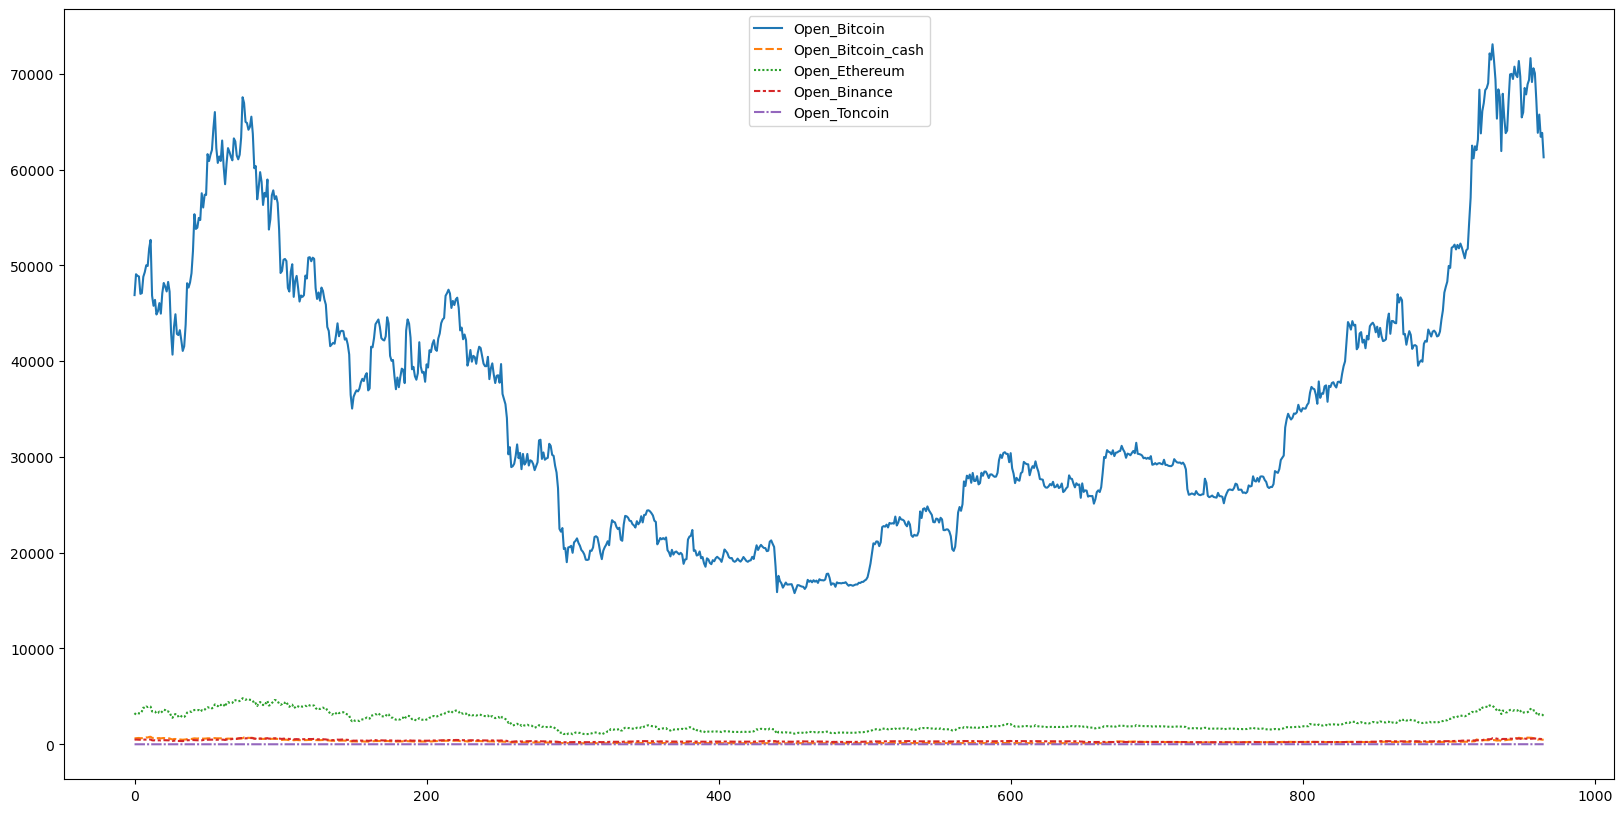

In [30]:
plt.figure(figsize=(20,10))
sns.lineplot(open_df)

NameError: name 'close_df' is not defined